In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

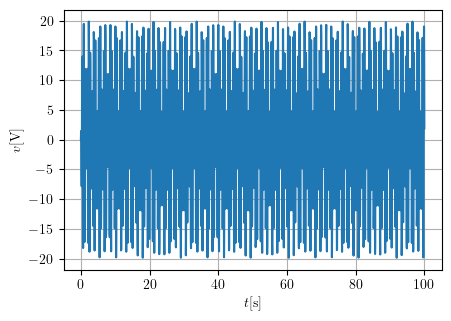

In [28]:
x = np.linspace(0,100,2000)
y = 20*np.sin(2*x)*np.cos(15*x)

plt.plot(x,y)
plt.grid()
plt.xlabel('$t$[s]')
plt.ylabel('$v$[V]')
plt.savefig('fig_prezentacija/bang_bang.pdf', format='pdf', bbox_inches='tight')

<h4>Bang bang teorijski</h4>

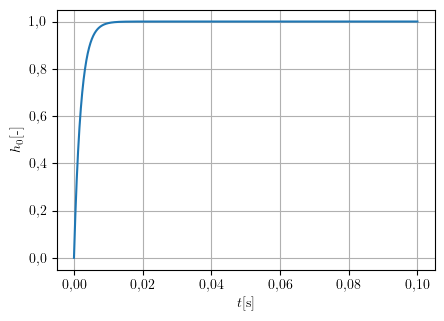

In [47]:
xx = np.linspace(0,0.1,1000)

bb = 1*(1-np.e**(-xx/0.002))

plt.plot(xx, bb)
plt.grid()
plt.ylabel('$h_0$[-]')
plt.xlabel('$t$[s]')
plt.savefig('fig_prezentacija/bbh.pdf', format='pdf', bbox_inches='tight')

<h3>FV teorijski</h3>

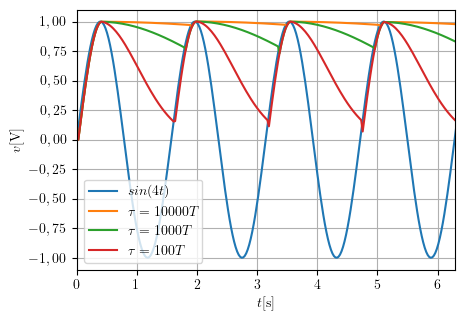

In [94]:
x = np.linspace(0,4*2*np.pi,1000)
sin = np.sin(4*x)

peakDet = np.zeros(len(x)) - 2
peakDet2 = np.zeros(len(x)) - 2
peakDet3 = np.zeros(len(x)) - 2

#teorijski
tau = 10000*2*np.pi
tau2 = 1000*2*np.pi
tau3 = 100*2*np.pi

#sin = abs(sin)

for i in range (len(x)):
    if (peakDet[i-1]<sin[i]):
        cnt = 0
        peakDet[i] = sin[i-1]
    else:
        cnt = cnt + 1
        peakDet[i] = peakDet[i-1]*np.e**(-cnt/tau)
        
for i in range (len(x)):
    if (peakDet2[i-1]<sin[i]):
        cnt = 0
        peakDet2[i] = sin[i-1]
    else:
        cnt = cnt + 1
        peakDet2[i] = peakDet2[i-1]*np.e**(-cnt/tau2)
        
for i in range (len(x)):
    if (peakDet3[i-1]<sin[i]):
        cnt = 0
        peakDet3[i] = sin[i-1]
    else:
        cnt = cnt + 1
        peakDet3[i] = peakDet3[i-1]*np.e**(-cnt/tau3)
        

plt.plot(x,sin, label = r'$sin(4t)$')
plt.plot(x,peakDet, label = r'$\tau = 10000 T$')
plt.plot(x,peakDet2, label = r'$\tau = 1000 T$')
plt.plot(x,peakDet3, label = r'$\tau = 100 T$')
plt.xlabel('$t$[s]')
plt.ylabel('$v$[V]')
plt.grid()
plt.legend()
plt.xlim(0,np.pi*2)
plt.savefig('fig_prezentacija/peakDet.pdf', format='pdf', bbox_inches='tight')